# Credit card fraud detection

This project has as an objectif to distinguish between legitimate and fraudulent transactions based on patterns and anomalies in the data, as it helps financial institutions identify and prevent fraudulent transactions.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
# see how the dataset is set
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#see the type of data, and if there's missing values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can notice that there is not missing values in our dataset, hence no treatment is required :>

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Perparing data for the Train and test split 

First of all, we'll check the distribution of our Class column, which is the column we want to predict.
The column has binary values

In [6]:
# to visualize
classes = data['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# percentage of legit cards
legit = round((classes[0]/data['Class'].count())*100,2)
legit

99.83

In [8]:
#precentage of Fraudulant cards
fraud = round((classes[1]/data['Class'].count())*100,2)
fraud

0.17

Only 0.17% of cards are fraud, which makes the prediction a bit tricky and misleading. Let me explain why:

Our model job is predict fraudulant cards accurately, but when we have such small count of fraud cards, our model can still get a high accuracy if it predictes the legit cards as they're the majority of the dataset, so **we have to adress this issue later.**

### Checking the correlation between columns

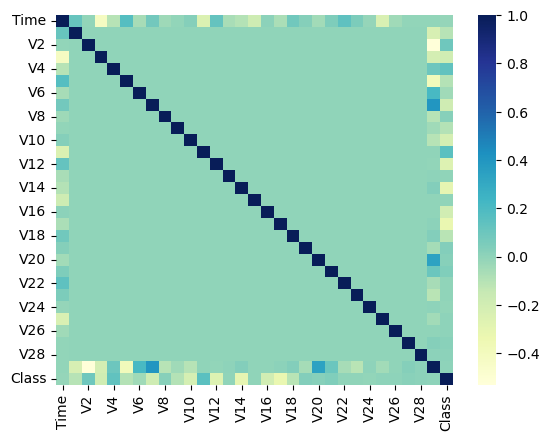

In [9]:
sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu',)
plt.show()

We can see that the Time column has no correlation with the Class column, so we can simply drop it

In [10]:
#dropping the time column
time = data.drop('Time',axis=1, inplace=False) #inplace is false meaning it returns the removed dataframe 
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\Users\hp\AppData\Local\Temp\ipykernel_15848\2946310014.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_legit['Amount'],label='fraud',hist=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_15848\2946310014.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(d

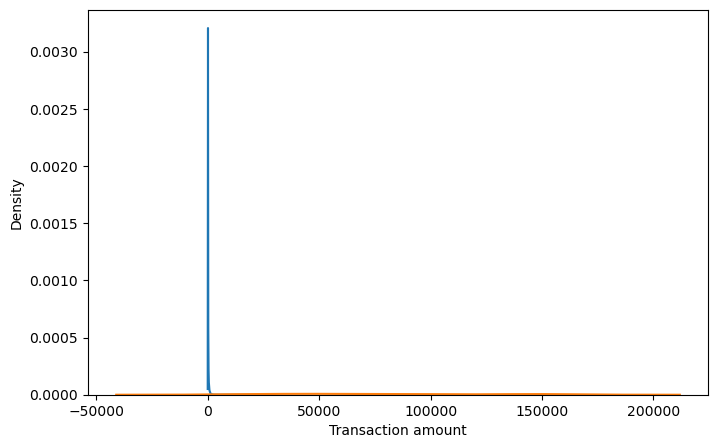

In [11]:
data_fraud = data[data['Class']==1]
data_legit = data[data['Class']==0]

#check the correlation with the amount
plt.figure(figsize=(8,5))
ax = sns.distplot(data_legit['Amount'],label='fraud',hist=False)
ax = sns.distplot(data_fraud['Time'],label='legit',hist=False)

ax.set(xlabel='Transaction amount')
plt.show()

We can see that the fraudulant transactions are spiked in the lower half of the amounts, but the legit transactions are spread out through all the plan.
To further make use of the amount column, we shall **standardize** it, which is known as `Feature scaling`

### Train_test_split and Feature scaling 

Only the amount column that needs to be standardized to the PCA-transformation.

**note**: We should split the data first before doing the scaling, This is because the scaling parameters (mean, standard deviation, etc.) should be computed only on the training data to prevent data leakage.
If you scale your entire dataset before splitting, information from the test set might influence the scaling, leading to optimistic performance estimates.

In [12]:
# for performing the train_test_split
from sklearn.model_selection import train_test_split
# for performing the feature scaling
from sklearn.preprocessing import StandardScaler

X = data.drop('Class',axis=1,inplace=False)

y_original = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y_original, test_size = 0.2, stratify=y_original, random_state=70)

scaler = StandardScaler()

#perform feature scaling to the training data (aka caculate the mean and variance to standardize)
X_train_scaled = scaler.fit_transform(X_train)

# use the same parameters found in the training data to the test data
X_test_scaled = scaler.transform(X_test)

`Why transform train data then test data`: Feature scaling aims to bring all features to a similar scale, and its purpose is to help optimization algorithms converge faster. The scaling parameters should be derived from the training set to avoid introducing information from the test set into the training process.

####  Note for checking the skewness
I didn't check the skewness because normally classification, tree-based algorithms and SVMs are not that sensitive to the distribution of the target variable. 

# Choosing an algorithm
Now that our data is ready to get it working, we shall choose a good algorithm fit for our model.
Since this is a classification problem, we got 4 choices:

### Logistic Regression:
Logistic Regression is a versatile algorithm designed for binary classification tasks. It predicts the probability of a sample belonging to a specific class (usually denoted as 0 or 1) based on input features.
Best suited for tasks with two possible outcomes.
### Decision Trees:
Decision Trees employ recursive partitioning, recursively asking questions to create hierarchical structures.
Versatile for both classificatio and prediction types of tasks, handling non-linear relationships effectively.
`Requires pruning to prevent your data to overfit.`
### Random Forest:
Is an ensemble method, combining the outputs of multiple Decision Trees to enhance predictive accuracy and mitigate individual tree idiosyncrasies(characetristics). By aggregating the results of numerous trees and incorporating randomness, Random Forest diminishes overfitting tendencies and achieves robust generalization across diverse datasets.
`Requires Computation costs, especially with an extensive forest.`
### XGBoost:
Short for Extreme Gradient Boosting, is an ensemble learning algorithm renowned for its speed and performance. It's capable of handling both classification and regression tasks by constructing an ensemble of weak learners (typically decision trees) and boosting their predictive power iteratively.

The reason why I'm choosing this algorithm over random forest and logistic regression is that:
- It deals with missing values automatically, part of the algorithm
- Tree pruning
- Handles highly imbalanced data very well
- good for PCA-Transformed data
- It implies L1 and L2 regularization

In [13]:
sum(y_train)/len(y_train)

0.001729245759178389

This tells me that the data is well distributed (0.17%), so `stratify` did work!

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(objective="binary:logistic",missing=0,seed=42,eval_metric="aucpr", early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train,eval_set=eval_set)


[0]	validation_0-aucpr:0.75646
[1]	validation_0-aucpr:0.78115
[2]	validation_0-aucpr:0.83530
[3]	validation_0-aucpr:0.83197
[4]	validation_0-aucpr:0.83401
[5]	validation_0-aucpr:0.83739
[6]	validation_0-aucpr:0.85082
[7]	validation_0-aucpr:0.86258
[8]	validation_0-aucpr:0.86509
[9]	validation_0-aucpr:0.86784
[10]	validation_0-aucpr:0.86856
[11]	validation_0-aucpr:0.86983
[12]	validation_0-aucpr:0.86802
[13]	validation_0-aucpr:0.86690
[14]	validation_0-aucpr:0.86769
[15]	validation_0-aucpr:0.86648
[16]	validation_0-aucpr:0.86685
[17]	validation_0-aucpr:0.86675
[18]	validation_0-aucpr:0.86782
[19]	validation_0-aucpr:0.86790
[20]	validation_0-aucpr:0.86887


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Now let's evaluate our model by using confusion matrix and a classification report

In [16]:
X_test['V1'].unique()

array([-1.01938809, -1.03454807,  1.23908446, ...,  0.99837056,
        1.76369799,  0.76378143])

But **before!!!**, it turns out that there are some missing values in our data, let's fix that while preparing our pipeline

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

class missingDataHandling(BaseEstimator, TransformerMixin):
    
    def __init__(self,column_name,strategy):
        self.column_name = column_name
        self.strategy = strategy
    
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        column_imputing = X[self.column_name].values.reshape(-1,1) # to make it 2d for the imputer
        imputer = SimpleImputer(strategy=self.strategy)
        imputed_values = imputer.fit_transform(column_imputing)
        X[self.column_name] = imputed_values.flatten() # to bring it back to 1d column
        return X
        
pipelines= {}

if X_train is not None and not X_train.empty:
    for column in X_train.columns:
        pipelines[column] = Pipeline([
            ('imputer', missingDataHandling(column_name=column, strategy="mean"))
            # You can add more transformers to the pipeline here
        ])
else:
    print("X_train is None or empty. Please check your data.")

In [18]:
for column, pipeline in pipelines.items():
    if column == 'Time':
        continue  # Skip this column
    X_train = pipeline.fit_transform(X_train)

In [19]:
t = X_test.isna()
for column in X_test:
    print(t[column].unique()) # check if all column have no missing values
    
print(X_test.columns)
print(X_test.dtypes)

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28    

In [20]:
model = XGBClassifier(objective="binary:logistic",missing=0,seed=42,eval_metric="aucpr", early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train,eval_set=eval_set)


[0]	validation_0-aucpr:0.75646
[1]	validation_0-aucpr:0.78115
[2]	validation_0-aucpr:0.83530
[3]	validation_0-aucpr:0.83197
[4]	validation_0-aucpr:0.83401
[5]	validation_0-aucpr:0.83739
[6]	validation_0-aucpr:0.85082
[7]	validation_0-aucpr:0.86258
[8]	validation_0-aucpr:0.86509
[9]	validation_0-aucpr:0.86784
[10]	validation_0-aucpr:0.86856
[11]	validation_0-aucpr:0.86983
[12]	validation_0-aucpr:0.86802
[13]	validation_0-aucpr:0.86690
[14]	validation_0-aucpr:0.86769
[15]	validation_0-aucpr:0.86648
[16]	validation_0-aucpr:0.86685
[17]	validation_0-aucpr:0.86675
[18]	validation_0-aucpr:0.86782
[19]	validation_0-aucpr:0.86790
[20]	validation_0-aucpr:0.86887


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

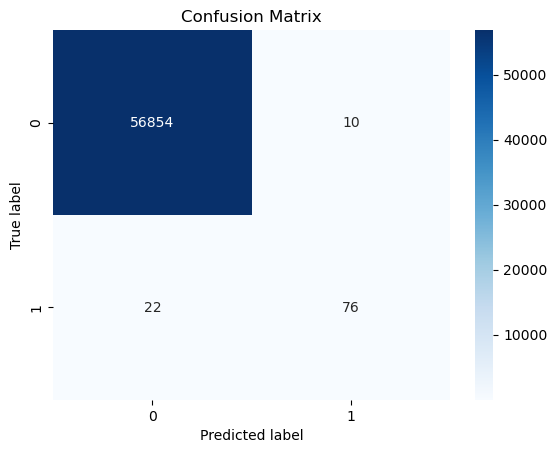

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


In [21]:
from sklearn.metrics import classification_report

for column, pipeline in pipelines.items():
    if column == 'Time':
        continue  # Skip this column
    X_test = pipeline.fit_transform(X_test)
    
X_test['Time'] = X_test['Time'].replace({' ': 0, None: 0})

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test,y_pred)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

# Acc = 56854 + 22 / 56962
# print(f"Accuracy = 99.8490%")

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)

print(f"The accuracy is {acc_score:0.4f}%, the auc_score = {auc_score:0.4f}%")

The accuracy is 0.9994%, the auc_score = 0.8877%


So this is the default stats of the XGBoost algorithm, **even tho the accuracy is high but we missed correctly predicting 22 fraudulant card(the minority class)**, which is bad, part of it is the highly imbalanced data. Let's further optimize our algorithm by modifying the hyperparameters of XGB.

In [23]:
#Predicting all ones
accuracy_score(y_train, np.zeros_like(y_train)), roc_auc_score(y_train, np.zeros_like(y_train))

(0.9982707542408216, 0.5)

`The line above tells us the minimum accuracies and values we should get in our model to count it as a good model`

## Optimizing hyperparameters using Cross-Validation and GridSearch

**XGBoost** has a lot of hyperparameters, that we have to manually configure, including `max_depth`, the maximum tree depth, and `learning rate`, `gamma`, the parameter that encourages pruning, `reg_lambda`, the regularization parameter lambda, `scale_pos_weight` to further balance the imbalanced data.
We'll be using the **GridSearchCV()** to optimize these hyperparameters, we specify a variety of values to each hyperparameter, and `GridSearchCV` will test all the possibility combinations and give the best combination amongt them.

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model = XGBClassifier()

# first round
param_grid = {
    'max_depth':[3,4,5,6],
    'learning_rate':[0.1,0.25,0.5],
    'gamma':[0.1,0.25,1],
    'scale_pos_weight':[10,100,500],
    'reg_lambda':[0.1,1,10]
}

gridSearch = GridSearchCV(model,param_grid, cv=10, scoring="accuracy", return_train_score=True)
gridSearch.fit(X_train,y_train)

best_param = gridSearch.best_params_
print(best_param)

{'gamma': 0.25, 'learning_rate': 0.25, 'max_depth': 5, 'reg_lambda': 0.1, 'scale_pos_weight': 10}


In [34]:

# second round
param_grid = {
    'max_depth':[5],
    'learning_rate':[0.25],
    'gamma':[0.25],
    'scale_pos_weight':[10,15,20],
    'reg_lambda':[0.05,0.085,0.1]
}

gridSearch = GridSearchCV(model,param_grid, cv=10, scoring="accuracy", return_train_score=True)
gridSearch.fit(X_train,y_train)

best_param = gridSearch.best_params_
print(best_param)

{'gamma': 0.25, 'learning_rate': 0.25, 'max_depth': 5, 'reg_lambda': 0.1, 'scale_pos_weight': 10}


Okay! So we're officialy done:
- gamma = 0.25
- learning_rate = 0.25
- max_depth = 5
- reg_lambda = 0.1
- scale_pos_weight = 10

In [35]:
# Building the final XGB model
model = XGBClassifier(objective="binary:logistic",gamma=0.05,learning_rate=0.25,max_depth=5,reg_lambda=0.01,scale_pos_weight=10,missing=0,seed=42,eval_metric="aucpr", early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train,eval_set=eval_set)

[0]	validation_0-aucpr:0.76173
[1]	validation_0-aucpr:0.73068
[2]	validation_0-aucpr:0.72830
[3]	validation_0-aucpr:0.74951
[4]	validation_0-aucpr:0.78745
[5]	validation_0-aucpr:0.73321
[6]	validation_0-aucpr:0.74980
[7]	validation_0-aucpr:0.74883
[8]	validation_0-aucpr:0.74162
[9]	validation_0-aucpr:0.77635
[10]	validation_0-aucpr:0.77461
[11]	validation_0-aucpr:0.78793
[12]	validation_0-aucpr:0.78487
[13]	validation_0-aucpr:0.78168
[14]	validation_0-aucpr:0.82261
[15]	validation_0-aucpr:0.81293
[16]	validation_0-aucpr:0.81938
[17]	validation_0-aucpr:0.82619
[18]	validation_0-aucpr:0.82461
[19]	validation_0-aucpr:0.83318
[20]	validation_0-aucpr:0.83272
[21]	validation_0-aucpr:0.83389
[22]	validation_0-aucpr:0.83500
[23]	validation_0-aucpr:0.83989
[24]	validation_0-aucpr:0.83677
[25]	validation_0-aucpr:0.84414
[26]	validation_0-aucpr:0.84198
[27]	validation_0-aucpr:0.84504
[28]	validation_0-aucpr:0.84395
[29]	validation_0-aucpr:0.84261
[30]	validation_0-aucpr:0.84276
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

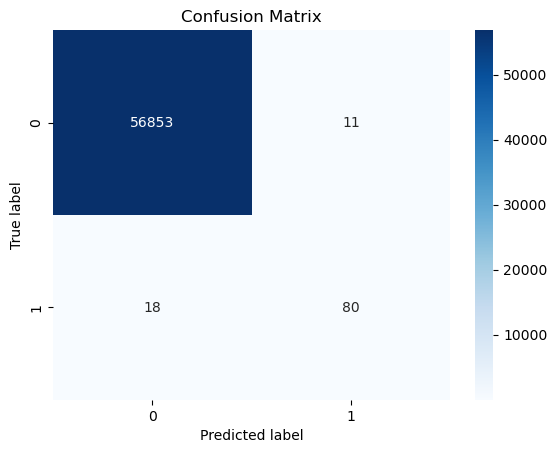

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


In [36]:
for column, pipeline in pipelines.items():
    if column == 'Time':
        continue  # Skip this column
    X_test = pipeline.fit_transform(X_test)
    
X_test['Time'] = X_test['Time'].replace({' ': 0, None: 0})

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test,y_pred)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)

print(f"The accuracy is {acc_score:0.4f}%, the auc_score = {auc_score:0.4f}%")

The accuracy is 0.9995%, the auc_score = 0.9081%


## Oversampling + XGB

The concept of oversampling is, the minority class (the class with fewer instances) is artificially increased by generating synthetic examples or replicating existing ones until the class distribution is balanced.

In [44]:
from imblearn.over_sampling import RandomOverSampler

[0]	validation_0-aucpr:0.06071
[1]	validation_0-aucpr:0.10291
[2]	validation_0-aucpr:0.52319
[3]	validation_0-aucpr:0.52656
[4]	validation_0-aucpr:0.63547
[5]	validation_0-aucpr:0.68856
[6]	validation_0-aucpr:0.68699
[7]	validation_0-aucpr:0.68600
[8]	validation_0-aucpr:0.72122
[9]	validation_0-aucpr:0.72020
[10]	validation_0-aucpr:0.72666
[11]	validation_0-aucpr:0.72555
[12]	validation_0-aucpr:0.72725
[13]	validation_0-aucpr:0.73105
[14]	validation_0-aucpr:0.73082
[15]	validation_0-aucpr:0.73225
[16]	validation_0-aucpr:0.73236
[17]	validation_0-aucpr:0.73202
[18]	validation_0-aucpr:0.73183
[19]	validation_0-aucpr:0.75798
[20]	validation_0-aucpr:0.75947
[21]	validation_0-aucpr:0.76069
[22]	validation_0-aucpr:0.76121
[23]	validation_0-aucpr:0.76392
[24]	validation_0-aucpr:0.76047
[25]	validation_0-aucpr:0.74942
[26]	validation_0-aucpr:0.75087
[27]	validation_0-aucpr:0.74866
[28]	validation_0-aucpr:0.75052
[29]	validation_0-aucpr:0.75071
[30]	validation_0-aucpr:0.80298
[31]	validation_0-

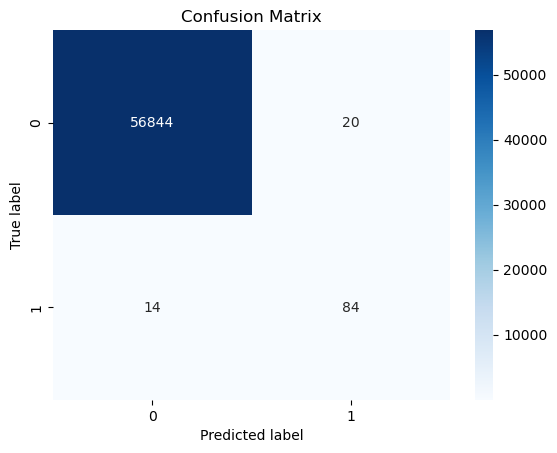

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

oversampling = RandomOverSampler()

X_train_over, y_train_over = oversampling.fit_resample(X_train, y_train)

model = XGBClassifier(objective="binary:logistic",gamma=0.05,learning_rate=0.25,max_depth=5,reg_lambda=0.01,scale_pos_weight=10,missing=0,seed=42,eval_metric="aucpr", early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

model.fit(X_train_over,y_train_over,eval_set=eval_set)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Perform cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')


# # Print the cross-validation scores
# print("Cross-validation scores:", scores)
# print("Mean accuracy:", scores.mean())

y_pred_over = model.predict(X_test)

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test,y_pred_over)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

In [52]:
acc_score = accuracy_score(y_test,y_pred_over)
auc_score = roc_auc_score(y_test,y_pred_over)

print(f"The accuracy is {acc_score:0.4f}%, the auc_score = {auc_score:0.4f}%")

The accuracy is 0.9994%, the auc_score = 0.9284%


## Undersampling + XGB

The concept of Undersampling is, removing some observations of the majority class to balanced out the majority and minority class.

[0]	validation_0-aucpr:0.06071
[1]	validation_0-aucpr:0.10291
[2]	validation_0-aucpr:0.52319
[3]	validation_0-aucpr:0.52656
[4]	validation_0-aucpr:0.63547
[5]	validation_0-aucpr:0.68856
[6]	validation_0-aucpr:0.68699
[7]	validation_0-aucpr:0.68600
[8]	validation_0-aucpr:0.72122
[9]	validation_0-aucpr:0.72020
[10]	validation_0-aucpr:0.72666
[11]	validation_0-aucpr:0.72555
[12]	validation_0-aucpr:0.72725
[13]	validation_0-aucpr:0.73105
[14]	validation_0-aucpr:0.73082
[15]	validation_0-aucpr:0.73225
[16]	validation_0-aucpr:0.73236
[17]	validation_0-aucpr:0.73202
[18]	validation_0-aucpr:0.73183
[19]	validation_0-aucpr:0.75798
[20]	validation_0-aucpr:0.75947
[21]	validation_0-aucpr:0.76069
[22]	validation_0-aucpr:0.76121
[23]	validation_0-aucpr:0.76392
[24]	validation_0-aucpr:0.76047
[25]	validation_0-aucpr:0.74942
[26]	validation_0-aucpr:0.75087
[27]	validation_0-aucpr:0.74866
[28]	validation_0-aucpr:0.75052
[29]	validation_0-aucpr:0.75071
[30]	validation_0-aucpr:0.80298
[31]	validation_0-

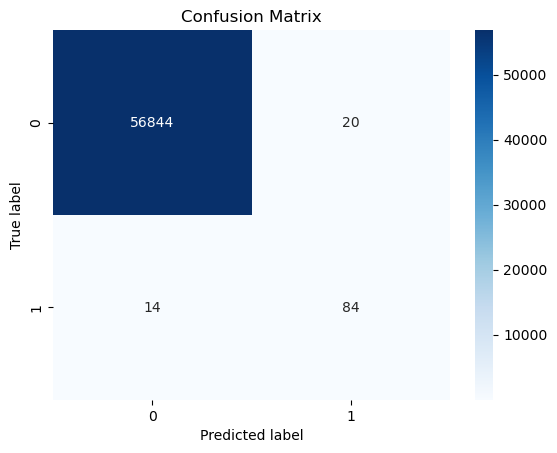

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

undersampling = RandomUnderSampler()

X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)

model = XGBClassifier(objective="binary:logistic",gamma=0.05,learning_rate=0.25,max_depth=5,reg_lambda=0.01,scale_pos_weight=10,missing=0,seed=42,eval_metric="aucpr", early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

model.fit(X_train_over,y_train_over,eval_set=eval_set)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Perform cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')


# # Print the cross-validation scores
# print("Cross-validation scores:", scores)
# print("Mean accuracy:", scores.mean())

y_pred_under = model.predict(X_test)

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test,y_pred_under)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

In [56]:
acc_score = accuracy_score(y_test,y_pred_under)
auc_score = roc_auc_score(y_test,y_pred_under)

print(f"The accuracy is {acc_score:0.4f}%, the auc_score = {auc_score:0.4f}%")

The accuracy is 0.9994%, the auc_score = 0.9284%


## Cost benefit analysis
To enhance the accuracy and reliability of our credit card fraud detection model, we used techniques such as oversampling and undersampling to explore the data thoroughly, making sure to catch any imbalances in the dataset.

By employing the XGBoost algorithm, we boosted our model's ability to spot even the most subtle patterns in the data, helping it make better predictions. These careful steps ensure that our model is not only accurate but also strong enough to handle any challenges it may face.

Final accuracy achieved in our model is 99,94% (A pretty high accuracy but remember the highly-imbalanced data), **good**.